In [1]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include(pathtorepo * "dynamical-systems\\system.jl")
include(pathtorepo * "dynamical-systems\\visual_regimes.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems
E, x, y  = 0..40, 0..5,  0..5
box = E × x × y
using CairoMakie, GLMakie
using LinearAlgebra

In [3]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [4]:
time = 1000; tt = 1000; tstep = 0.001; times = [time, tt]
integ_set = (alg = Vern9(), adaptive = false, dt = tstep);

U0 = 0.268371462842221 # 0.265;
I0 = -1.75061296075842 # -1.7064049

Homoclinic destroyed

U0 = 0.2665
I0 = -1.7266
I0 =  -1.7265152 более точная граница

In [154]:
U0 = 0.2665; I0 = -1.7265152 #-1.7265151221443
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0_1 = shift
println("last point  pink trajectory:$u0_1")

last point  pink trajectory:[1.7179320586715578, 0.9272835050926821, 0.9621907929989197]


In [155]:
[1.7174816805868953, 0.9273011301846298, 0.9622003523070933]

3-element Vector{Float64}:
 1.7174816805868953
 0.9273011301846298
 0.9622003523070933

In [156]:
ds = CoupledODEs(TM, u0_1, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    Vern9
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.2665, 0.305, 0.3, -1.7265152]
 time:          0.0
 state:         [1.7179320586715578, 0.9272835050926821, 0.9621907929989197]


In [157]:
fp, ei, _ = fixedpoints(ds, box, jacob_TM_);

In [158]:
fp

3-dimensional StateSpaceSet{Float64} with 3 points
 1.71761  0.927248  0.962221
 8.32665  0.73847   0.438176
 1.71893  0.927196  0.962193

In [159]:
ei[1]

3-element Vector{ComplexF64}:
    -7.448326631057968 + 0.0im
  -0.30303030293653405 + 0.0im
 -0.021802268604215334 + 0.0im

In [160]:
idx = 3
Jac = jacob_TM_(fp[idx], p, 0)
eivecs = eigvecs(Jac)
shift = real(eivecs[:, 1])*1e-3 + fp[idx]

3-element SVector{3, Float64} with indices SOneTo(3):
 1.7179320586715578
 0.9272835050926821
 0.9621907929989197

In [161]:
TM([1.71826,  0.927222,  0.962207], p, 0)

3-element SVector{3, Float64} with indices SOneTo(3):
 -3.8877749532527055e-5
  3.06376250247542e-6
 -4.4315791536408966e-8

In [162]:
tr, trange = trajectory(ds, 500, Δt = tstep)

(3-dimensional StateSpaceSet{Float64} with 500001 points, 0.0:0.001:500.0)

In [164]:
ts, tf = 1, 500000
idx, idy, idz = 3, 2, 1

GLMakie.activate!()
f = Figure(resolution = (700, 700))

ax = LScene(f[1, 1], show_axis = true)

scale!(ax.scene, 50, 50, 1)

lines!(tr[ts:tf, idx], tr[ts:tf, idy], tr[ts:tf,idz],
    linewidth = 0.5, color = :deeppink)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = colors[i], markersize = 10)
end

display(GLMakie.Screen(), f)

GLMakie.Screen(...)

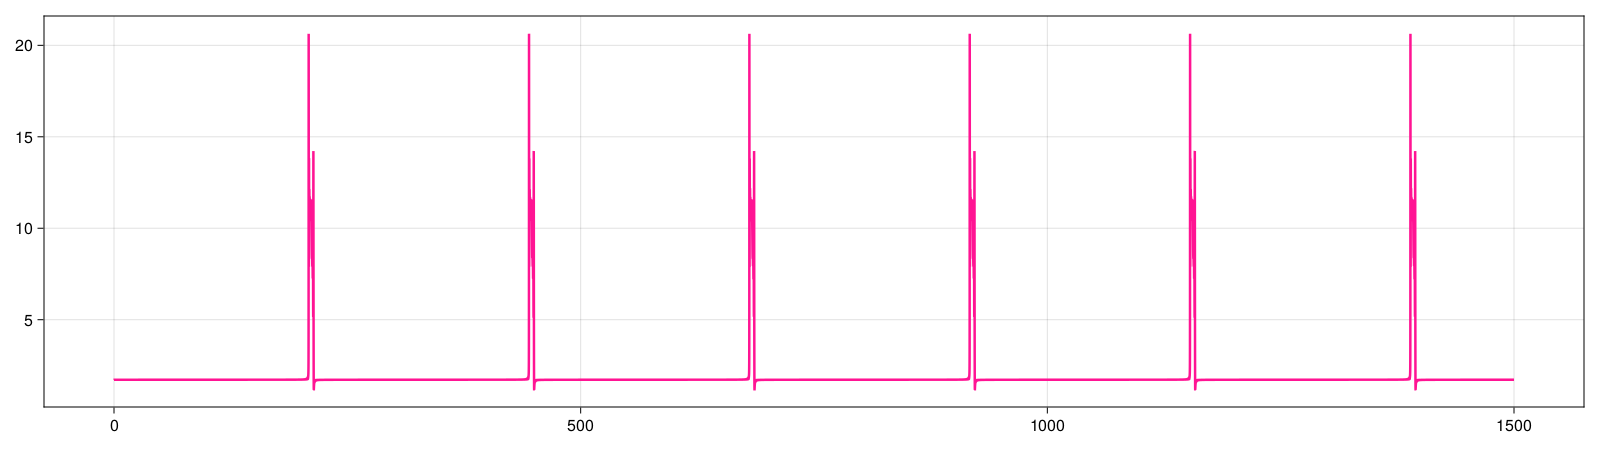

CairoMakie.Screen{IMAGE}


In [135]:
ts, tf = 1, 1500000

CairoMakie.activate!()
f = Figure(resolution = (1600, 450))
ax = Axis(f[1, 1])

lines!(trange[ts:tf], tr[ts:tf, 1], linewidth = 2.5, color = :deeppink)
#display(GLMakie.Screen(), f)
display(f)

In [15]:
colors = ["orange", "black", "blue"];